In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

## Step 1 : Reading & Understanding Data :

In [2]:
bike_sharing = pd.read_csv('day.csv')

In [3]:
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_sharing.shape

(730, 16)

In [5]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Checking/Handling Missing Values :

In [7]:
# Let's check row wise missing values :

100 * (bike_sharing.isnull().sum() / len(bike_sharing), 2)

(instant       0.0
 dteday        0.0
 season        0.0
 yr            0.0
 mnth          0.0
 holiday       0.0
 weekday       0.0
 workingday    0.0
 weathersit    0.0
 temp          0.0
 atemp         0.0
 hum           0.0
 windspeed     0.0
 casual        0.0
 registered    0.0
 cnt           0.0
 dtype: float64,
 2,
 instant       0.0
 dteday        0.0
 season        0.0
 yr            0.0
 mnth          0.0
 holiday       0.0
 weekday       0.0
 workingday    0.0
 weathersit    0.0
 temp          0.0
 atemp         0.0
 hum           0.0
 windspeed     0.0
 casual        0.0
 registered    0.0
 cnt           0.0
 dtype: float64,
 2,
 instant       0.0
 dteday        0.0
 season        0.0
 yr            0.0
 mnth          0.0
 holiday       0.0
 weekday       0.0
 workingday    0.0
 weathersit    0.0
 temp          0.0
 atemp         0.0
 hum           0.0
 windspeed     0.0
 casual        0.0
 registered    0.0
 cnt           0.0
 dtype: float64,
 2,
 instant       0.0
 dteda

In [8]:
# Let's check column wise missing values :

100 * (bike_sharing.isnull().sum(axis=1) / len(bike_sharing), 2)

(0      0.0
 1      0.0
 2      0.0
 3      0.0
 4      0.0
       ... 
 725    0.0
 726    0.0
 727    0.0
 728    0.0
 729    0.0
 Length: 730, dtype: float64,
 2,
 0      0.0
 1      0.0
 2      0.0
 3      0.0
 4      0.0
       ... 
 725    0.0
 726    0.0
 727    0.0
 728    0.0
 729    0.0
 Length: 730, dtype: float64,
 2,
 0      0.0
 1      0.0
 2      0.0
 3      0.0
 4      0.0
       ... 
 725    0.0
 726    0.0
 727    0.0
 728    0.0
 729    0.0
 Length: 730, dtype: float64,
 2,
 0      0.0
 1      0.0
 2      0.0
 3      0.0
 4      0.0
       ... 
 725    0.0
 726    0.0
 727    0.0
 728    0.0
 729    0.0
 Length: 730, dtype: float64,
 2,
 0      0.0
 1      0.0
 2      0.0
 3      0.0
 4      0.0
       ... 
 725    0.0
 726    0.0
 727    0.0
 728    0.0
 729    0.0
 Length: 730, dtype: float64,
 2,
 0      0.0
 1      0.0
 2      0.0
 3      0.0
 4      0.0
       ... 
 725    0.0
 726    0.0
 727    0.0
 728    0.0
 729    0.0
 Length: 730, dtype: float64,
 2,
 0  

#### No missing values

### Handling duplicates values :

In [9]:
bike_duplicate = bike_sharing.copy()

In [10]:
bike_duplicate.drop_duplicates(inplace= True)
bike_duplicate.shape

(730, 16)

#### No duplicates found

## Step 2: Dropping Redundunt Columns :

#### Here are some facts as per our Dataset characteristics

- instant : This is just index column.

- dteday : We already have different columns for year and month. No need of this column we can drop this.

- casual & registered : We can also drop this column. Hence, we just need to target 'cnt' variable not any particular category.

- Let's create new dataframe for further analysis.

In [11]:
bike_sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
bike_new = bike_sharing[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [13]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Step 3: Data Visualisation :

#### We'll perform below task :

- Using pairplot, we'll check that all the variables linearly relate or not.
- Will also check strong corelation with target variable.

#### Visualising Numerical variable :

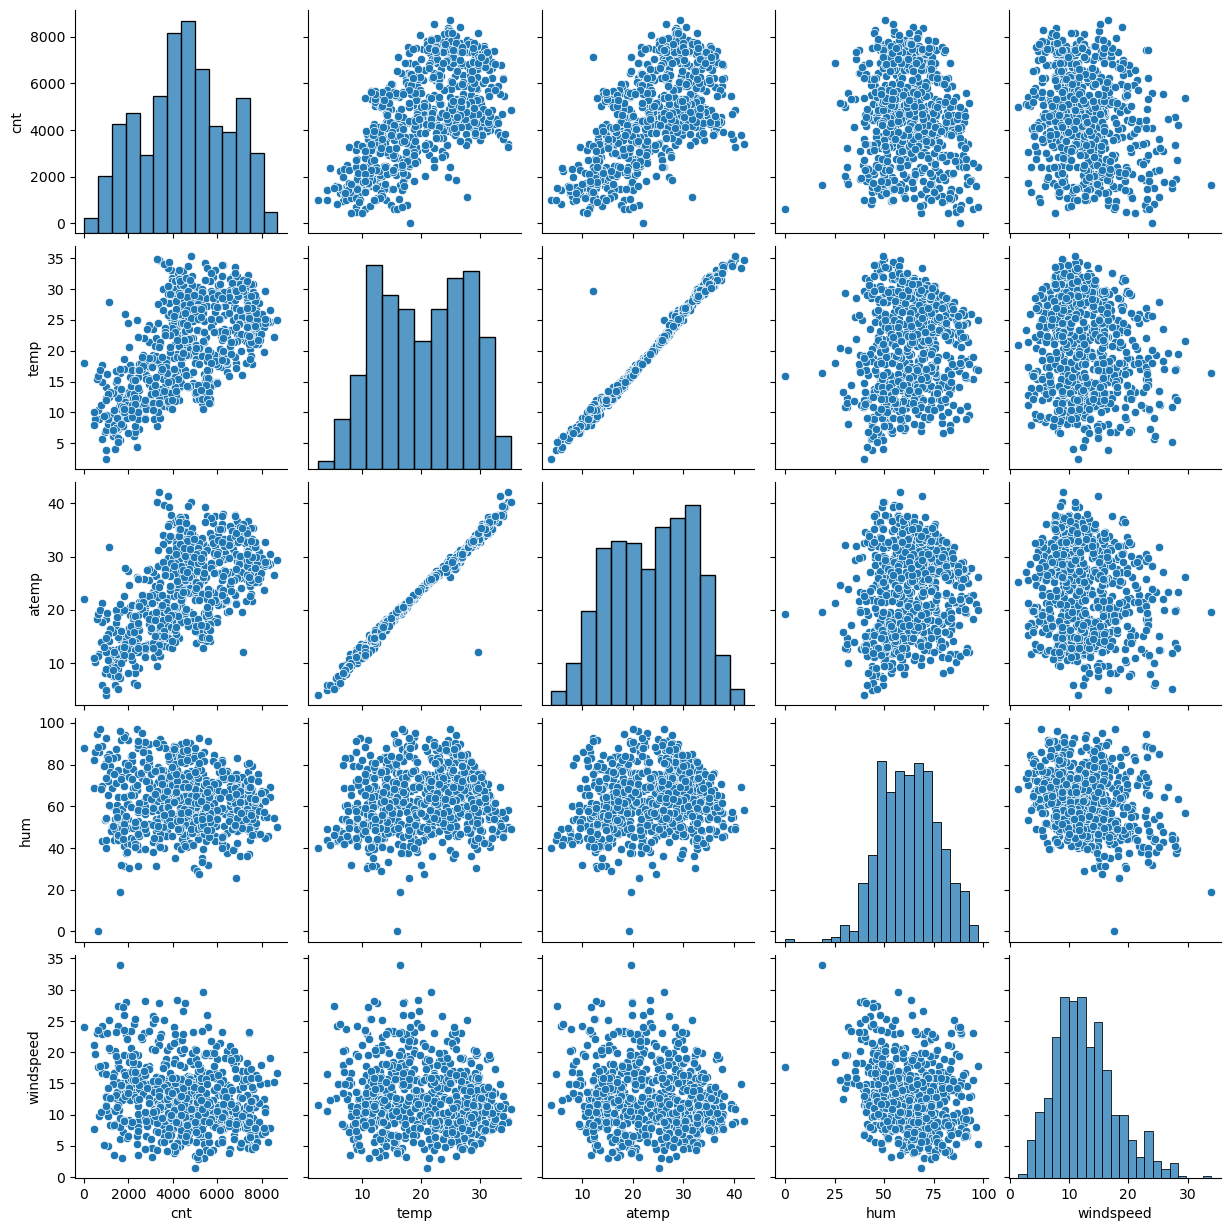

In [14]:
sns.pairplot(data = bike_new, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### Conslusion :

- By visualising the numeric variables, we can conclude that a linear model can be considered in this case

#### Visualising Categorical variable :

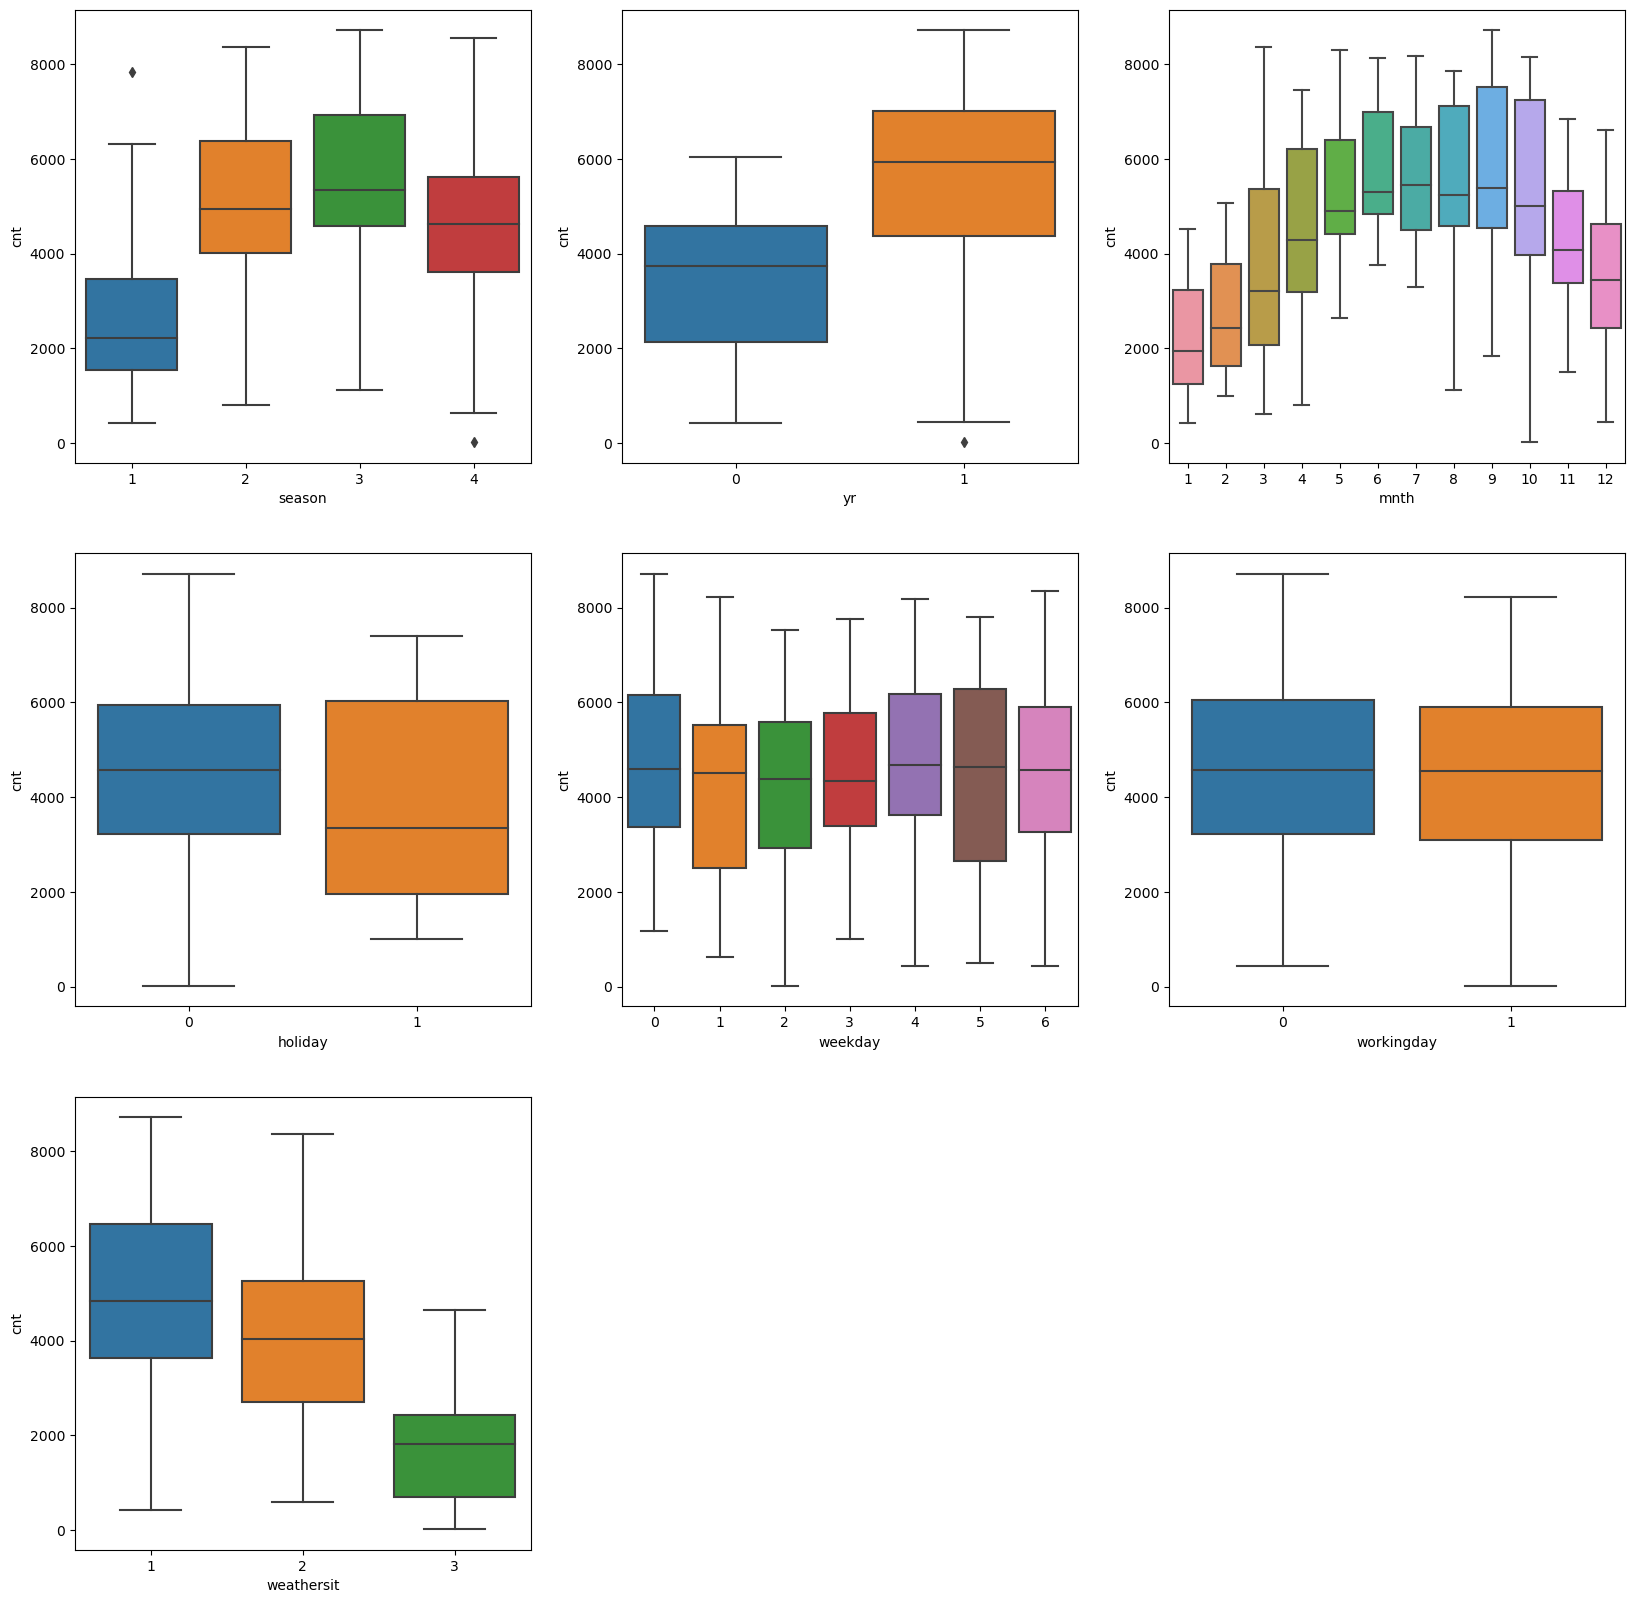

In [15]:
plt.figure(figsize= [20,20])

plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=bike_new)

plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=bike_new)

plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=bike_new)

plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=bike_new)

plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data=bike_new)

plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=bike_new)

plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data=bike_new)

plt.show()

#### Conclusion :

- We can clearly see the season variable that Fall has the highest demanding season among rest of the seasons.
- Year 2019, has the most demanding year than Year 2018.
- Total users of Count fall between 4000 to 6000.
- Highest count of total users is in July.

## Step 4: Data Preparation:

#### Here we'll perform two things :

- Mapping columns and Convert columns into their respective string format
- Creating Dummy Variables

In [16]:
import calendar

In [17]:
bike_new['mnth'] = bike_new['mnth'].apply(lambda x: calendar.month_abbr[x])

In [18]:
bike_new.season = bike_new.season.map({ 1: 'Spring',
                                        2:'Summer',
                                        3:'Fall',
                                        4:'Winter'
                                      })

In [19]:
bike_new.weathersit = bike_new.weathersit.map ({ 1 : 'Clear', 2: 'Mist & Cloudy', 3: 'Light Snow & Rain', 4: 'Heavy Snow & Rain'})

In [20]:
bike_new.weekday = bike_new.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [21]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Creating Dummy Variables:

- In this dataset, columns like mnth, weathersit, weekday, season have category levels.
- We'll create Dummy variables for these 4 columns.

In [22]:
dummy_set = bike_new[['season', 'mnth', 'weathersit', 'weekday']]

In [23]:
dummy_set = pd.get_dummies(dummy_set, drop_first=True)

In [24]:
# concat with main dataframe

bike_new = pd.concat([dummy_set, bike_new], axis=1)

In [25]:
bike_new.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [26]:
# deleting previous columns

bike_new.drop(['season'], axis=1, inplace=True)
bike_new.drop(['mnth'], axis=1, inplace=True)
bike_new.drop(['weathersit'], axis=1, inplace=True)
bike_new.drop(['weekday'], axis=1, inplace=True)

In [27]:
bike_new.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Tuesday,weekday_Wednesday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [28]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 730 non-null    uint8  
 1   season_Summer                 730 non-null    uint8  
 2   season_Winter                 730 non-null    uint8  
 3   mnth_Aug                      730 non-null    uint8  
 4   mnth_Dec                      730 non-null    uint8  
 5   mnth_Feb                      730 non-null    uint8  
 6   mnth_Jan                      730 non-null    uint8  
 7   mnth_Jul                      730 non-null    uint8  
 8   mnth_Jun                      730 non-null    uint8  
 9   mnth_Mar                      730 non-null    uint8  
 10  mnth_May                      730 non-null    uint8  
 11  mnth_Nov                      730 non-null    uint8  
 12  mnth_Oct                      730 non-null    uint8  
 13  mnth_

In [29]:
bike_new.shape

(730, 30)

## Step 5: Splitting Data into Training & Testing 

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train, test = train_test_split(bike_new, train_size=0.7, test_size= 0.3, random_state=100)

In [32]:
train.shape

(510, 30)

In [33]:
test.shape

(219, 30)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 510 non-null    uint8  
 1   season_Summer                 510 non-null    uint8  
 2   season_Winter                 510 non-null    uint8  
 3   mnth_Aug                      510 non-null    uint8  
 4   mnth_Dec                      510 non-null    uint8  
 5   mnth_Feb                      510 non-null    uint8  
 6   mnth_Jan                      510 non-null    uint8  
 7   mnth_Jul                      510 non-null    uint8  
 8   mnth_Jun                      510 non-null    uint8  
 9   mnth_Mar                      510 non-null    uint8  
 10  mnth_May                      510 non-null    uint8  
 11  mnth_Nov                      510 non-null    uint8  
 12  mnth_Oct                      510 non-null    uint8  
 13  mnth

## Step 6: Rescalling

Scaling is not crucial for simple linear regression, but it becomes important in multiple linear regression. For example, when features like "cnt" have much higher values than others (e.g., "temp", "atemp"), rescaling is necessary. Without it, coefficients in the regression model may be disproportionately large or small, causing issues during model evaluation. 

Standardization or normalization are common rescaling techniques to ensure all coefficients are on the same scale. Here we'll use MinMaxScaler for rescalling

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [36]:
# Applying this method to those columns whose values are high, excluding dummy variables.

num_vars = ['cnt', 'hum', 'temp', 'atemp', 'windspeed']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [37]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Tuesday,weekday_Wednesday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,1,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [38]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Tuesday,weekday_Wednesday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.152941,0.135294,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.360284,0.342373,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Now each of these values are in between 0 and 1. It's working perfectly.

#### Checking the highly correlated variables :

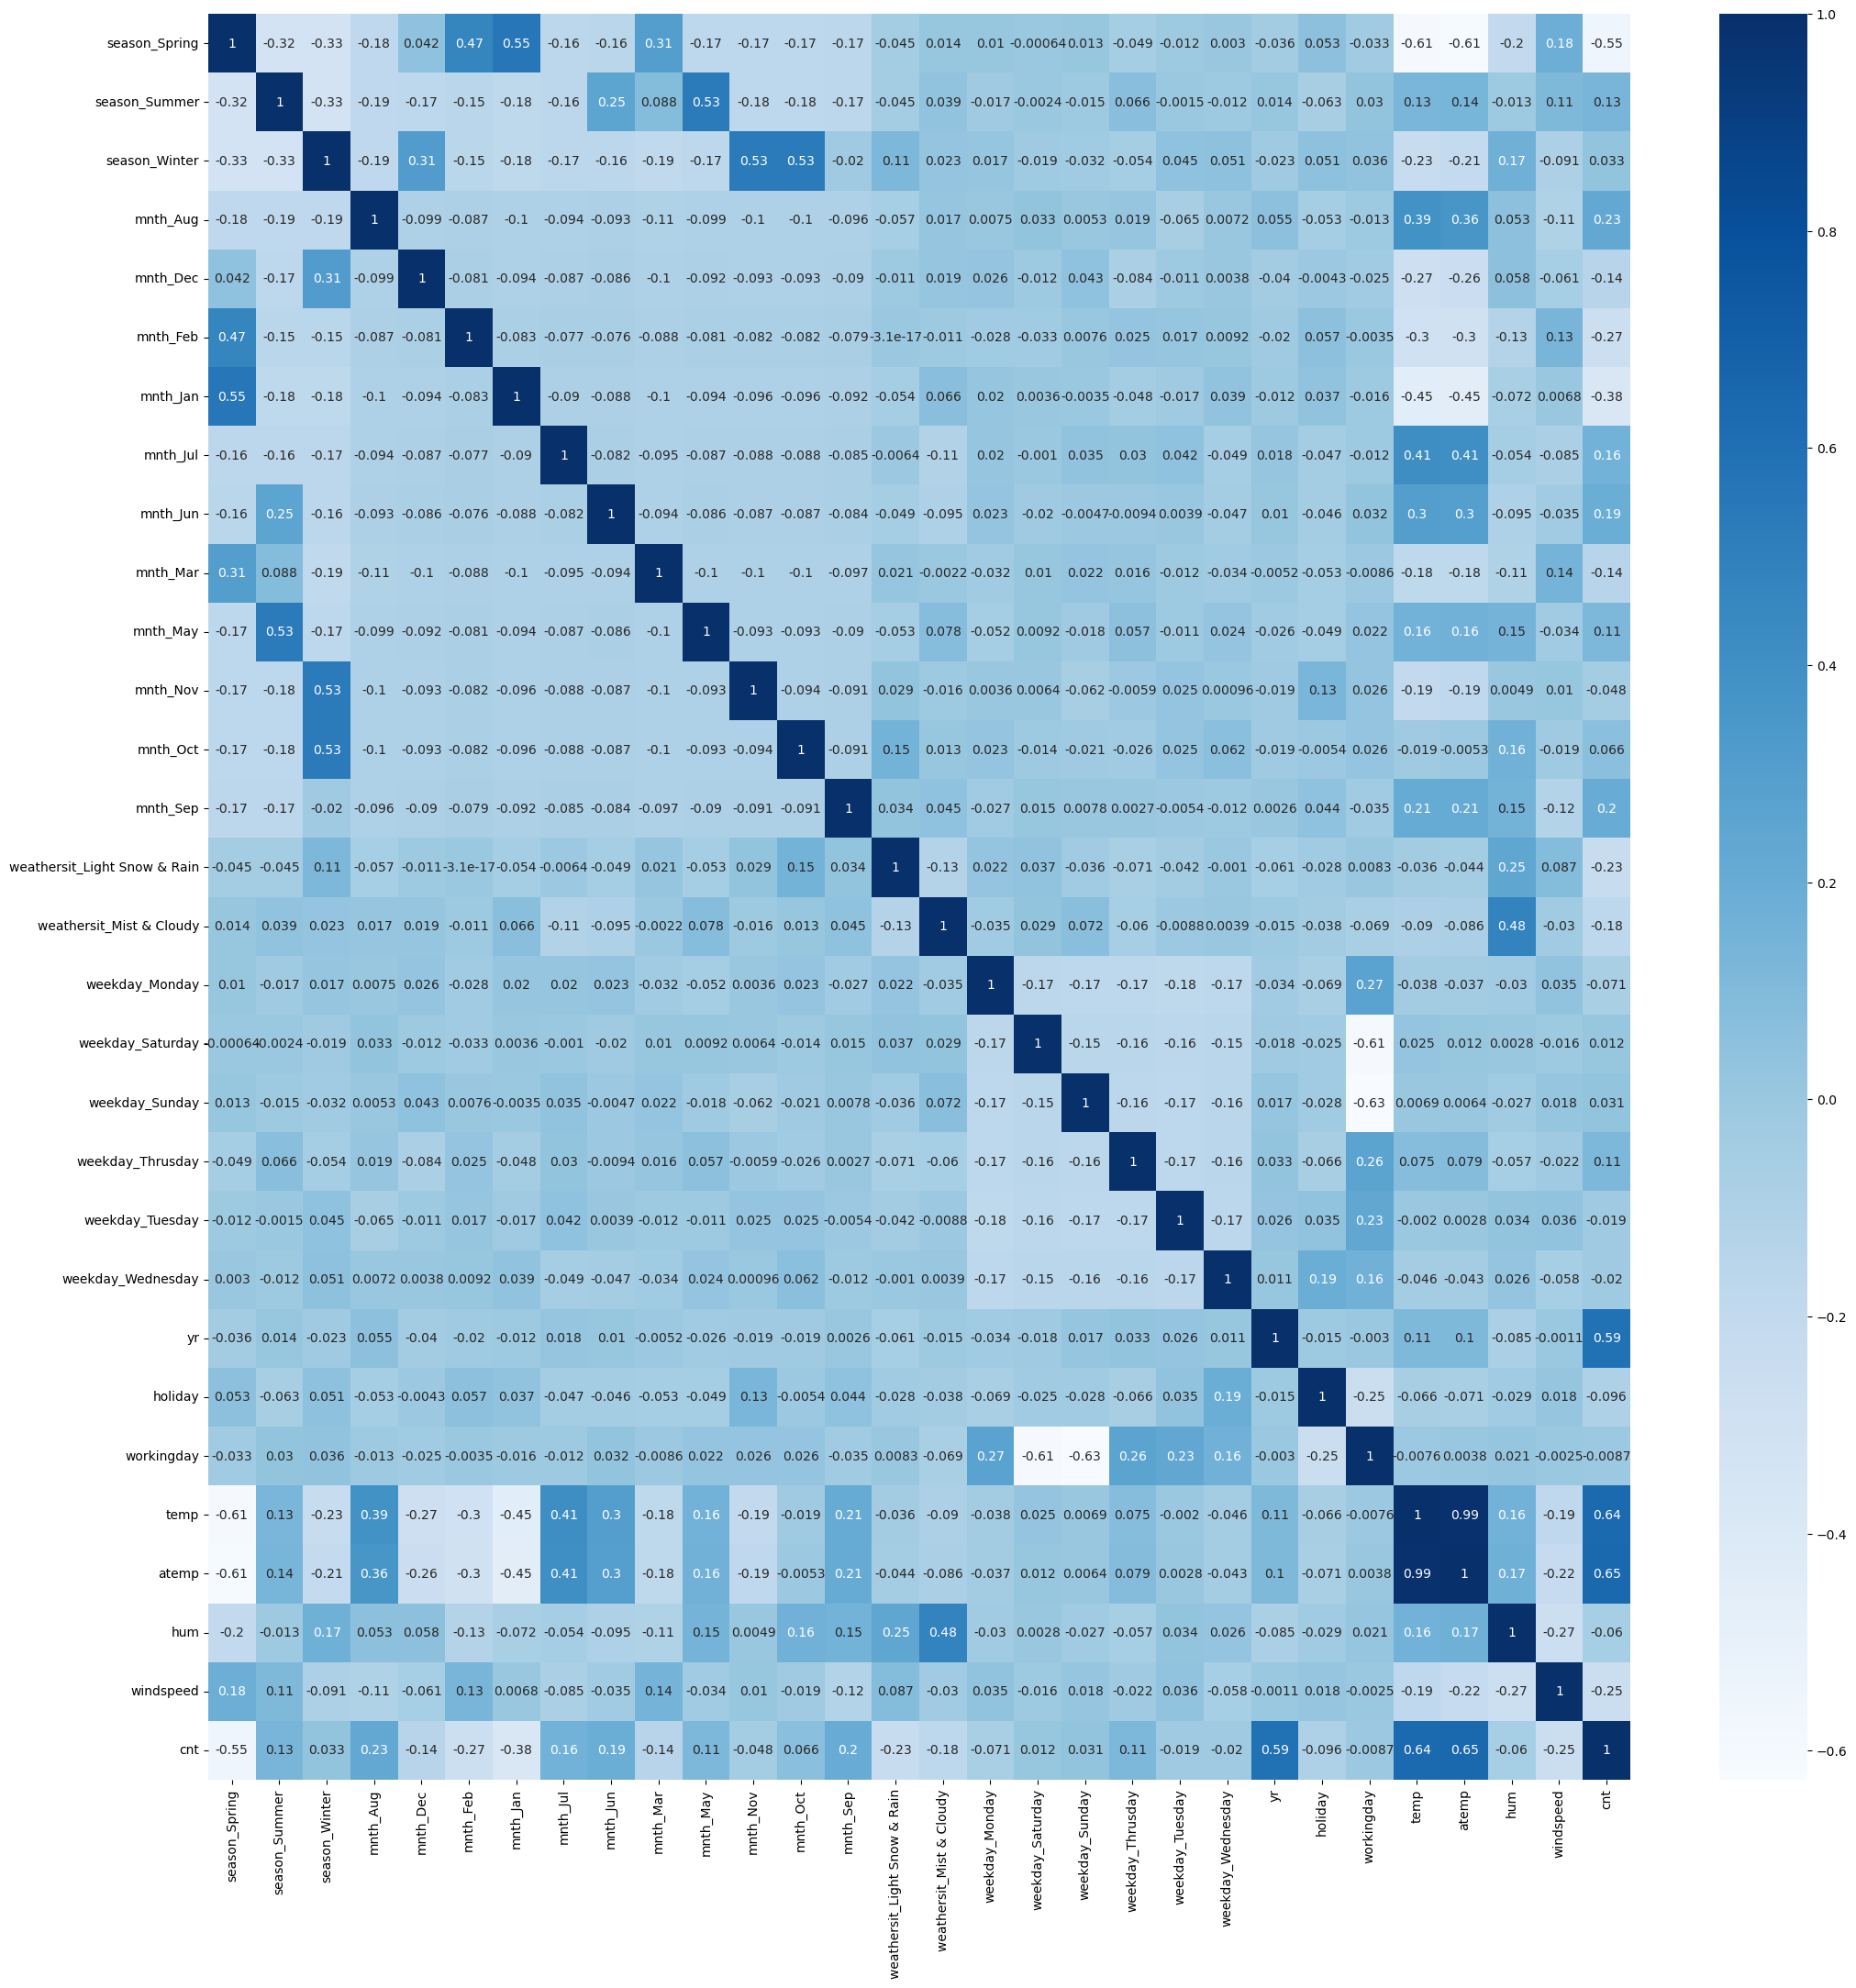

In [39]:
plt.figure(figsize=[25,25])
sns.heatmap(train.corr(), annot=True, cmap='Blues')
plt.show()

- We can see that temp & atemp are correlated to target variable cnt but other columns are also not clear.

## Step 7: Model Building

In [40]:
#our target and dependent var is cnt  so we need to remove for further operations

y_train = train.pop('cnt')
X_train = train

In [41]:
y_train.shape

(510,)

### Feature selection

In [42]:
# importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 510 non-null    uint8  
 1   season_Summer                 510 non-null    uint8  
 2   season_Winter                 510 non-null    uint8  
 3   mnth_Aug                      510 non-null    uint8  
 4   mnth_Dec                      510 non-null    uint8  
 5   mnth_Feb                      510 non-null    uint8  
 6   mnth_Jan                      510 non-null    uint8  
 7   mnth_Jul                      510 non-null    uint8  
 8   mnth_Jun                      510 non-null    uint8  
 9   mnth_Mar                      510 non-null    uint8  
 10  mnth_May                      510 non-null    uint8  
 11  mnth_Nov                      510 non-null    uint8  
 12  mnth_Oct                      510 non-null    uint8  
 13  mnth

In [44]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [45]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 7),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 5),
 ('weekday_Thrusday', False, 13),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 11),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [74]:
col1 = X_train.columns[rfe.support_]
col1

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Dec',
       'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [75]:
X_train.columns[~ rfe.support_]

Index(['mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday',
       'workingday', 'atemp'],
      dtype='object')

In [76]:
# let's create X_test dataframe with RFE selected variables

X_train_rfe = X_train[col1]

In [77]:
import statsmodels.api as sm

- We need to add constant because if we don't, statsmodels fits a regression line passing through the origin, by default.

In [78]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [79]:
X_train_rfe.shape

(510, 16)

In [80]:
X_train_rfe.head()

,const,season_Spring,season_Summer,season_Winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,temp,hum,windspeed
653,1.0,0,0,1,0,0,0,0,0,0,0,1,0,0.509887,0.575354,0.300794
576,1.0,0,0,0,0,0,1,0,0,0,0,1,0,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,0,0,0,0,1,1,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,1,0,0,0,0,0,0,1,0,0.245101,0.498067,0.663106
482,1.0,0,1,0,0,0,0,0,0,0,1,1,0,0.395666,0.504508,0.188475


#### Running first model

In [81]:
lm_1 = sm.OLS(y_train,X_train_rfe).fit()

In [82]:
lm_1.params

const                           0.320243
season_Spring                  -0.061737
season_Summer                   0.040767
season_Winter                   0.103435
mnth_Dec                       -0.037199
mnth_Jan                       -0.043748
mnth_Jul                       -0.055495
mnth_Nov                       -0.040949
mnth_Sep                        0.074891
weathersit_Light Snow & Rain   -0.248116
weathersit_Mist & Cloudy       -0.055876
yr                              0.230328
holiday                        -0.091228
temp                            0.479977
hum                            -0.160227
windspeed                      -0.188457
dtype: float64

In [83]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Fri, 29 Dec 2023   Prob (F-statistic):          3.34e-189
Time:                        14:57:56   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### p-value is satisfied for all the variables here.

### Checking VIF for mulicollinearity

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.48
1,season_Spring,5.27
13,temp,4.42
3,season_Winter,3.83
2,season_Summer,2.76
14,hum,1.93
7,mnth_Nov,1.76
5,mnth_Jan,1.68
10,weathersit_Mist & Cloudy,1.57
4,mnth_Dec,1.49


- VIF must be < 5. Here we can see some varibales which are beyond the criteria that we need to drop.

In [86]:
# dropping 'const' var

X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [87]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,hum,30.94
12,temp,17.80
14,windspeed,4.72
0,season_Spring,4.37
2,season_Winter,4.06
1,season_Summer,2.81
9,weathersit_Mist & Cloudy,2.32
10,yr,2.09
6,mnth_Nov,1.83
4,mnth_Jan,1.75


In [88]:
# dropping 'hum' var

X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [89]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,5.17
13,windspeed,4.67
2,season_Winter,2.94
0,season_Spring,2.89
1,season_Summer,2.23
10,yr,2.07
6,mnth_Nov,1.80
4,mnth_Jan,1.66
5,mnth_Jul,1.59
9,weathersit_Mist & Cloudy,1.56


- Here we can see, temp VIF value is equally 5 so don't need to drop.

## Preparing Final Model

In [90]:
# adding the constant

X_train_lm = sm.add_constant(X_train_rfe)

In [91]:
# first fit model

lm_2 = sm.OLS(y_train, X_train_lm).fit()

In [92]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Fri, 29 Dec 2023   Prob (F-statistic):          1.57e-186
Time:                        15:17:39   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

- Calculate VIF for new model

In [93]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,5.17
13,windspeed,4.67
2,season_Winter,2.94
0,season_Spring,2.89
1,season_Summer,2.23
10,yr,2.07
6,mnth_Nov,1.80
4,mnth_Jan,1.66
5,mnth_Jul,1.59
9,weathersit_Mist & Cloudy,1.56


- Every other variables except temp has < 5 VIF values so we'll continue with second model.

## Step 8: Residual Analysis

- Let's build histogram to check error terms that they're normally distributed or not.

In [96]:
y_train_cnt = lm_2.predict(X_train_lm)

Text(0.5, 0, 'Errors')

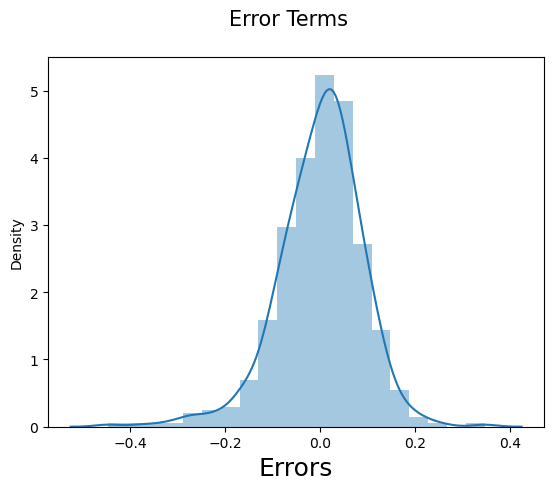

In [98]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 15)                  
plt.xlabel('Errors', fontsize = 18)                         

- In linear regression the error should be normally distributed and around 0 which we can see in above graph.

## Step 9: Predictions using Final Model

In [100]:
# applying scaling on test set

num_vars = ['cnt', 'hum', 'temp', 'atemp', 'windspeed']
test[num_vars] = scaler.transform(test[num_vars])

In [101]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Tuesday,weekday_Wednesday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.123288,0.155251,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.329520,0.362974,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [102]:
y_test = test.pop('cnt')
X_test = test

In [103]:
# adding constant

X_test = sm.add_constant(X_test)

#### Predicting using values used by the final model

In [104]:
test_col = X_train_lm.columns
X_test = X_test[test_col[1:]]

# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_Spring                 219 non-null    uint8  
 2   season_Summer                 219 non-null    uint8  
 3   season_Winter                 219 non-null    uint8  
 4   mnth_Dec                      219 non-null    uint8  
 5   mnth_Jan                      219 non-null    uint8  
 6   mnth_Jul                      219 non-null    uint8  
 7   mnth_Nov                      219 non-null    uint8  
 8   mnth_Sep                      219 non-null    uint8  
 9   weathersit_Light Snow & Rain  219 non-null    uint8  
 10  weathersit_Mist & Cloudy      219 non-null    uint8  
 11  yr                            219 non-null    int64  
 12  holiday                       219 non-null    int64  
 13  temp

In [105]:
# Let's predict the final model

y_pred = lm_2.predict(X_test)

### Calculating the R-Squared

In [106]:
from sklearn.metrics import r2_score

In [107]:
r2_score(y_test, y_pred)

0.8132736736429255

#### Value of R-squared of test dataset is 0.81 and trained dataset is 0.84 which is almost same and good enough.

## Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

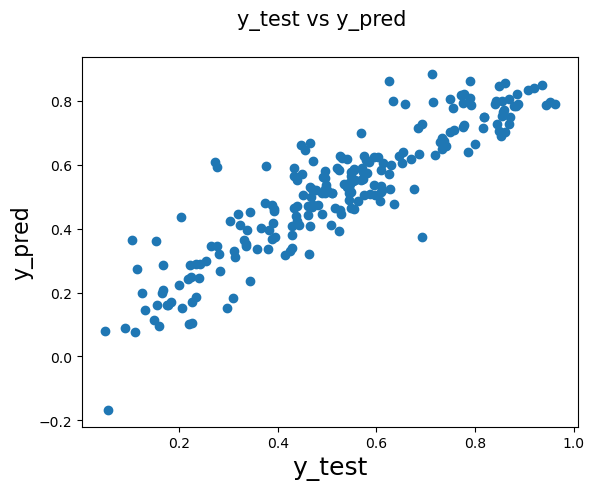

In [109]:
# Let's plot the graph b/w actual and predicted values

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15) 
plt.xlabel('y_test', fontsize = 18)                      
plt.ylabel('y_pred', fontsize = 16)

We can colude that the final model fit isn't by chance, and has descent predictive power.

Getting the variable names and the coefficient values for the final equation of the best fitted line

In [112]:
param = pd.DataFrame(lm_2.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,15))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
13,temp,0.437655
0,const,0.246635
11,yr,0.234287
3,season_Winter,0.088652
8,mnth_Sep,0.068219
2,season_Summer,0.033271
7,mnth_Nov,-0.041852
4,mnth_Dec,-0.044529
5,mnth_Jan,-0.050270


## Conclusion :

Equation for our best fitted line is as below :

$ cnt = 0.2466 + 0.437 \times  temp + 0.2342  \times  yr + 0.08865 \times season Winter + 0.0682 \times mnth Sept + 0.033 \times season Summer - 0.0418 \times mnth Nov - 0.04452 \times mnth Dec - 0.050 \times mnth Jan - 0.0503 \times mnth Jul - 0.0716 \times season Spring - 0.0814 \times weathersit Mist Cloudy - 0.0919 \times holiday - 0.1585 \times windspeed - 0.2928 \times weathersit Light Snow Rain $

##### Positive coefficient indicates that incresing in these values will lead to an increse in the value of cnt.
##### Negative coefficient indicates that incresing in these values will lead to an decrese in the value of cnt.

- The analysis of R-Squared and adjusted R-Squared values for both the training and test datasets leads to the conclusion that the specified variables effectively account for more than 81% of the variation in bike demand.

- Examining the coefficients of the variables provides insights into the factors influencing bike demand.

- According to the final model, the top three features contributing significantly to explaining demand are as follows:

1. Temperature (Coefficient: 0.437655)
2. Weather Situation (weathersit): Light Snow, Light Rain + Mist & Cloudy (Coefficient: -0.292892)
3. Year (Coefficient: 0.234287)

- In summary, it is evident that temperature, weather conditions, and the year are substantial and significant variables for predicting the demand for shared bikes.

### Conclusive Suggestions for the Company:



1. Prioritize the months of January, July, September, November, and December, as they exhibit higher demand compared to other months.

2. Monitor temperature trends closely, as there is a positive correlation between temperature and demand. An increase in temperature corresponds to an increase in demand.

3. Prepare for heightened demand during the winter season, acknowledging the surge in bike demand during this period. Ensure the company is well-equipped to meet the increased demand during colder months.